In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas
import matplotlib.style as style

EAGLERAYBP_DATA = r'O:\PDI-Barlap\Aoo\HMR_YLD_MNT\EAGLERAYBP_DATA.csv'
FDBHMR6ET_DATA = r'O:\PDI-Barlap\Aoo\HMR_YLD_MNT\FDBHMR6ET_DATA.csv'
OUT_PATH = r'O:\PDI-Barlap\Aoo\HMR_YLD_MNT\YLD_DATA.csv'
FY_Car = r'O:\PDI-Barlap\Aoo\HMR_YLD_MNT\Calendar.csv'

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

eag = pd.read_csv(EAGLERAYBP_DATA)
fdb = pd.read_csv(FDBHMR6ET_DATA)
all = pd.concat([eag,fdb])
all["STARTQTY"] = all["STARTQTY"].fillna(0)
all["REASONQTY"] = all["REASONQTY"].fillna(0)
all["BONUSQTY"] = all["BONUSQTY"].fillna(0)
all["DEFECTPERCENTAGE"] = all["DEFECTPERCENTAGE"].fillna(0)
all["NORMALISED"] = all["NORMALISED"].fillna(0)
all["TotalQty"] = all["FinalShipQty"] + all["TotalScrapQty"]
all["Net_REASONQTY"] = all["REASONQTY"] - all["BONUSQTY"]
all["%DEFECT"] = all["Net_REASONQTY"]/all["TotalQty"]*100
loading_parts = (pd.pivot_table(all, values='TotalQty', index=['Time_Date'], columns=['PRODUCT'], aggfunc=np.mean,fill_value=0 , margins=False).reset_index().rename_axis(None, axis=0))
defect_parts = (pd.pivot_table(all, values='REASONQTY', index=['PRODUCT','Time_Date'], columns=['DEF_CODE'], aggfunc=np.sum, fill_value=0, margins=False).reset_index().rename_axis(None, axis=0))

all.tail(11)
#ss = all.loc[all['WW'] == "FY2237"]
#ss

,WW,Time_Date,FinalShipQty,TotalScrapQty,R ShipQty,InProcess Yield,Machine Yield,DEF_CODE,DESCRIPTION,REASONQTY,BONUSQTY,NORMALISED,STEPNAME,REASONCODE,STARTQTY,DEFECTPERCENTAGE,PRODUCT,TotalQty,Net_REASONQTY,%DEFECT
370,FY2237,20220313,0,1109,0,0.0,8.39,300,AKL,0,0,0.0,0,0,0,0.0,FDBHMR6ET,1109,0,0.0
371,FY2237,20220314,2117,2852,0,0.0,19.53,110,STRIPE HEIGHT,0,0,0.0,0,0,0,0.0,FDBHMR6ET,4969,0,0.0
372,FY2237,20220314,2117,2852,0,0.0,19.53,130,BROKEN BAR,0,0,0.0,0,0,0,0.0,FDBHMR6ET,4969,0,0.0
373,FY2237,20220314,2117,2852,0,0.0,19.53,280,WIREBOND,0,0,0.0,0,0,0,0.0,FDBHMR6ET,4969,0,0.0
374,FY2237,20220314,2117,2852,0,0.0,19.53,290,OSL,0,0,0.0,0,0,0,0.0,FDBHMR6ET,4969,0,0.0
375,FY2237,20220314,2117,2852,0,0.0,19.53,300,AKL,0,0,0.0,0,0,0,0.0,FDBHMR6ET,4969,0,0.0
376,FY2237,20220315,472,771,0,0.0,88.59,110,STRIPE HEIGHT,0,0,0.0,0,0,0,0.0,FDBHMR6ET,1243,0,0.0
377,FY2237,20220315,472,771,0,0.0,88.59,130,BROKEN BAR,0,0,0.0,0,0,0,0.0,FDBHMR6ET,1243,0,0.0
378,FY2237,20220315,472,771,0,0.0,88.59,280,WIREBOND,0,0,0.0,0,0,0,0.0,FDBHMR6ET,1243,0,0.0
379,FY2237,20220315,472,771,0,0.0,88.59,290,OSL,0,0,0.0,0,0,0,0.0,FDBHMR6ET,1243,0,0.0


In [2]:
E_Defect = defect_parts.loc[(defect_parts.PRODUCT == "EAGLERAYBP")]
E_Defect = pd.merge(loading_parts, E_Defect, on="Time_Date", how="outer").drop(columns=["FDBHMR6ET"]).fillna(0)
E_Defect = E_Defect.rename(columns={"EAGLERAYBP": "TOTAL", 110: "STH",130: "BRK",280: "WRB",290: "OSL",300: "AKL"})
E_Defect["PRODUCT"] = E_Defect["PRODUCT"].replace(0, "EAGLERAYBP")
E_Defect

F_Defect = defect_parts.loc[(defect_parts.PRODUCT == "FDBHMR6ET")]
F_Defect = pd.merge(loading_parts, F_Defect, on="Time_Date", how="outer").drop(columns=["EAGLERAYBP"]).fillna(0)
F_Defect = F_Defect.rename(columns={"FDBHMR6ET": "TOTAL", 110: "STH",130: "BRK",280: "WRB",290: "OSL",300: "AKL"})
F_Defect["PRODUCT"] = F_Defect["PRODUCT"].replace(0, "FDBHMR6ET")
F_Defect

EF_Defect = E_Defect.append(F_Defect)
EF_Defect["%DEFECT_STH"] = EF_Defect["STH"]/EF_Defect["TOTAL"]*100
EF_Defect["%DEFECT_BRK"] = EF_Defect["BRK"]/EF_Defect["TOTAL"]*100
EF_Defect["%DEFECT_WRB"] = EF_Defect["WRB"]/EF_Defect["TOTAL"]*100
EF_Defect["%DEFECT_OSL"] = EF_Defect["OSL"]/EF_Defect["TOTAL"]*100
EF_Defect["%DEFECT_AKL"] = EF_Defect["AKL"]/EF_Defect["TOTAL"]*100
Fiscal = pd.read_csv(FY_Car)
EF_Defect = pd.merge(Fiscal, EF_Defect, on="Time_Date", how="inner").fillna(0)
#EF_Defect.to_csv(OUT_PATH, index=None)
EF_Defect.tail(10)

#loading_parts

,WW,Time_Date,TOTAL,PRODUCT,STH,BRK,WRB,OSL,AKL,%DEFECT_STH,%DEFECT_BRK,%DEFECT_WRB,%DEFECT_OSL,%DEFECT_AKL
138,FY2236,20220311,4148,EAGLERAYBP,0,0,0,0,0,0.0,0.000000,0.0,0.000000,0.000000
139,FY2236,20220311,1977,FDBHMR6ET,0,60,0,0,0,0.0,3.034901,0.0,0.000000,0.000000
140,FY2237,20220312,15433,EAGLERAYBP,0,95,0,49,51,0.0,0.615564,0.0,0.317501,0.330461
141,FY2237,20220312,1097,FDBHMR6ET,0,0,0,0,0,0.0,0.000000,0.0,0.000000,0.000000
142,FY2237,20220313,1207,EAGLERAYBP,0,142,0,113,0,0.0,11.764706,0.0,9.362055,0.000000
143,FY2237,20220313,1109,FDBHMR6ET,0,0,0,0,0,0.0,0.000000,0.0,0.000000,0.000000
144,FY2237,20220314,21674,EAGLERAYBP,0,53,0,45,0,0.0,0.244533,0.0,0.207622,0.000000
145,FY2237,20220314,4969,FDBHMR6ET,0,0,0,0,0,0.0,0.000000,0.0,0.000000,0.000000
146,FY2237,20220315,8306,EAGLERAYBP,0,0,0,0,0,0.0,0.000000,0.0,0.000000,0.000000
147,FY2237,20220315,1243,FDBHMR6ET,0,0,0,0,0,0.0,0.000000,0.0,0.000000,0.000000


In [3]:
DW = (pd.pivot_table(all, values='REASONQTY', index=['WW',"PRODUCT"], columns=['DEF_CODE'], aggfunc=np.sum, fill_value=0, margins=False).reset_index().rename_axis(None, axis=0))
CW = (pd.pivot_table(all, values='TotalQty', index=['WW',"Time_Date","PRODUCT"], aggfunc=np.mean, fill_value=0, margins=False).reset_index().rename_axis(None, axis=0))
CE = (CW.groupby(["WW","PRODUCT"]).sum().reset_index().rename_axis(None, axis=0))
CE = pd.concat([CE, DW], axis=1)
CE = CE.iloc[:,[0,1,3,6,7,8,9,10]]
CE = CE.rename(columns={"TotalQty": "TOTAL", 110: "STH",130: "BRK",280: "WRB",290: "OSL",300: "AKL"})
CE["%DEFECT_STH"] = CE["STH"]/CE["TOTAL"]*100
CE["%DEFECT_BRK"] = CE["BRK"]/CE["TOTAL"]*100
CE["%DEFECT_WRB"] = CE["WRB"]/CE["TOTAL"]*100
CE["%DEFECT_OSL"] = CE["OSL"]/CE["TOTAL"]*100
CE["%DEFECT_AKL"] = CE["AKL"]/CE["TOTAL"]*100
CE

,WW,PRODUCT,TOTAL,STH,BRK,WRB,OSL,AKL,%DEFECT_STH,%DEFECT_BRK,%DEFECT_WRB,%DEFECT_OSL,%DEFECT_AKL
0,FY2227,EAGLERAYBP,82430,86,481,75,0,0,0.104331,0.583525,0.090986,0.000000,0.000000
1,FY2227,FDBHMR6ET,66918,21,287,10,171,103,0.031382,0.428883,0.014944,0.255537,0.153920
2,FY2228,EAGLERAYBP,42005,1,625,27,159,0,0.002381,1.487918,0.064278,0.378526,0.000000
3,FY2228,FDBHMR6ET,37086,12,438,127,122,0,0.032357,1.181039,0.342447,0.328965,0.000000
4,FY2229,EAGLERAYBP,107763,10,547,9,337,122,0.009280,0.507595,0.008352,0.312723,0.113211
5,FY2229,FDBHMR6ET,39406,27,307,9,112,0,0.068517,0.779069,0.022839,0.284221,0.000000
6,FY2230,EAGLERAYBP,69513,20,376,19,67,0,0.028772,0.540906,0.027333,0.096385,0.000000
7,FY2230,FDBHMR6ET,48893,6,155,4,58,104,0.012272,0.317019,0.008181,0.118626,0.212709
8,FY2231,EAGLERAYBP,54630,2,126,7,45,0,0.003661,0.230643,0.012813,0.082372,0.000000
9,FY2231,FDBHMR6ET,41287,11,330,12,42,159,0.026643,0.799283,0.029065,0.101727,0.385109


In [4]:
CE1 = CE.iloc[:-2,:]
CE1

,WW,PRODUCT,TOTAL,STH,BRK,WRB,OSL,AKL,%DEFECT_STH,%DEFECT_BRK,%DEFECT_WRB,%DEFECT_OSL,%DEFECT_AKL
0,FY2227,EAGLERAYBP,82430,86,481,75,0,0,0.104331,0.583525,0.090986,0.000000,0.000000
1,FY2227,FDBHMR6ET,66918,21,287,10,171,103,0.031382,0.428883,0.014944,0.255537,0.153920
2,FY2228,EAGLERAYBP,42005,1,625,27,159,0,0.002381,1.487918,0.064278,0.378526,0.000000
3,FY2228,FDBHMR6ET,37086,12,438,127,122,0,0.032357,1.181039,0.342447,0.328965,0.000000
4,FY2229,EAGLERAYBP,107763,10,547,9,337,122,0.009280,0.507595,0.008352,0.312723,0.113211
5,FY2229,FDBHMR6ET,39406,27,307,9,112,0,0.068517,0.779069,0.022839,0.284221,0.000000
6,FY2230,EAGLERAYBP,69513,20,376,19,67,0,0.028772,0.540906,0.027333,0.096385,0.000000
7,FY2230,FDBHMR6ET,48893,6,155,4,58,104,0.012272,0.317019,0.008181,0.118626,0.212709
8,FY2231,EAGLERAYBP,54630,2,126,7,45,0,0.003661,0.230643,0.012813,0.082372,0.000000
9,FY2231,FDBHMR6ET,41287,11,330,12,42,159,0.026643,0.799283,0.029065,0.101727,0.385109


In [5]:
RS = pd.merge(CE1, EF_Defect, on="WW", how="outer").fillna("OK")
RS = RS.loc[RS.PRODUCT_x == 'OK']
RS = RS.iloc[:,[13,14,15,16,17,18,19,20,21,22,23,24,25]]
#RS = RS[["Time_Date","TOTAL_y","PRODUCT_y","STH_y","BRK_y","%DEFECT_STH_y","%DEFECT_BRK_y"]]
RS = RS.rename(columns={"Time_Date": "WW","TOTAL_y": "TOTAL" ,"PRODUCT_y": "PRODUCT", "STH_y": "STH", "BRK_y": "BRK", "WRB_y": "WRB", "OSL_y": "OSL", "AKL_y": "AKL", "%DEFECT_STH_y": "%DEFECT_STH", "%DEFECT_BRK_y": "%DEFECT_BRK", "%DEFECT_WRB_y": "%DEFECT_WRB", "%DEFECT_OSL_y": "%DEFECT_OSL", "%DEFECT_AKL_y": "%DEFECT_AKL"})
PP = CE1.append(RS)
PP["TOTAL"] = PP["TOTAL"]/1000
PP['WW'] = PP['WW'].astype('string')
#PP.WW = PP.WW.astype(str)
#PP['WW'] = PP['WW'].astype('|S')
PP['%DEFECT_STH'] = PP['%DEFECT_STH'].astype('float')
PP['%DEFECT_BRK'] = PP['%DEFECT_BRK'].astype('float')
PP['%DEFECT_WRB'] = PP['%DEFECT_WRB'].astype('float')
PP['%DEFECT_OSL'] = PP['%DEFECT_OSL'].astype('float')
PP['%DEFECT_AKL'] = PP['%DEFECT_AKL'].astype('float')
PP
##PP.dtypes

,WW,PRODUCT,TOTAL,STH,BRK,WRB,OSL,AKL,%DEFECT_STH,%DEFECT_BRK,%DEFECT_WRB,%DEFECT_OSL,%DEFECT_AKL
0,FY2227,EAGLERAYBP,82.430,86,481,75,0,0,0.104331,0.583525,0.090986,0.000000,0.000000
1,FY2227,FDBHMR6ET,66.918,21,287,10,171,103,0.031382,0.428883,0.014944,0.255537,0.153920
2,FY2228,EAGLERAYBP,42.005,1,625,27,159,0,0.002381,1.487918,0.064278,0.378526,0.000000
3,FY2228,FDBHMR6ET,37.086,12,438,127,122,0,0.032357,1.181039,0.342447,0.328965,0.000000
4,FY2229,EAGLERAYBP,107.763,10,547,9,337,122,0.009280,0.507595,0.008352,0.312723,0.113211
5,FY2229,FDBHMR6ET,39.406,27,307,9,112,0,0.068517,0.779069,0.022839,0.284221,0.000000
6,FY2230,EAGLERAYBP,69.513,20,376,19,67,0,0.028772,0.540906,0.027333,0.096385,0.000000
7,FY2230,FDBHMR6ET,48.893,6,155,4,58,104,0.012272,0.317019,0.008181,0.118626,0.212709
8,FY2231,EAGLERAYBP,54.630,2,126,7,45,0,0.003661,0.230643,0.012813,0.082372,0.000000
9,FY2231,FDBHMR6ET,41.287,11,330,12,42,159,0.026643,0.799283,0.029065,0.101727,0.385109


In [6]:
oo = PP.loc[PP.PRODUCT == 'EAGLERAYBP']
oo = oo.iloc[:,[0,1,8,10,11,12]]
oo = oo.rename(columns={"%DEFECT_STH": "STH", "%DEFECT_BRK": "BRK", "%DEFECT_WRB": "WRB", "%DEFECT_OSL": "OSL", "%DEFECT_AKL": "AKL"})
oo

,WW,PRODUCT,STH,WRB,OSL,AKL
0,FY2227,EAGLERAYBP,0.104331,0.090986,0.000000,0.000000
2,FY2228,EAGLERAYBP,0.002381,0.064278,0.378526,0.000000
4,FY2229,EAGLERAYBP,0.009280,0.008352,0.312723,0.113211
6,FY2230,EAGLERAYBP,0.028772,0.027333,0.096385,0.000000
8,FY2231,EAGLERAYBP,0.003661,0.012813,0.082372,0.000000
10,FY2232,EAGLERAYBP,0.037719,0.031433,0.000000,0.000000
12,FY2233,EAGLERAYBP,0.029680,0.041223,0.000000,0.000000
14,FY2234,EAGLERAYBP,0.000000,0.000000,0.866368,0.271999
16,FY2235,EAGLERAYBP,0.007980,0.041895,0.000000,0.000000
18,FY2236,EAGLERAYBP,0.004581,0.000000,0.000000,0.000000


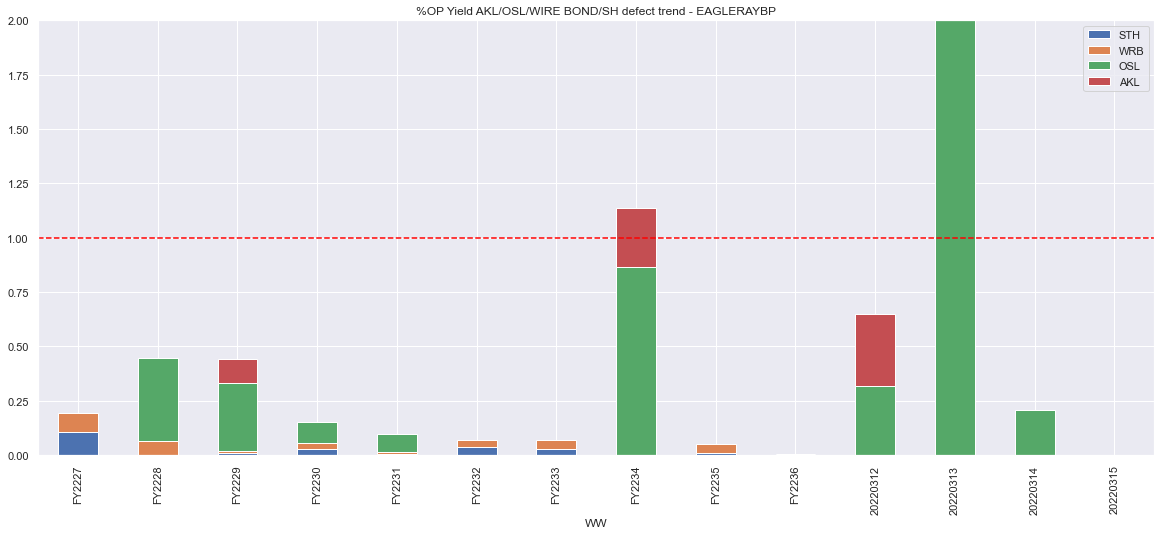

In [7]:
#set seaborn plotting aesthetics
sns.set(style='darkgrid')

#create stacked bar chart
#PP.set_index('WW').plot(kind='bar', stacked=True, color=['steelblue', 'red'])
oo.set_index('WW').plot(kind='bar', stacked=True, ylim=[0, 2], figsize=(20,8), title='%OP Yield AKL/OSL/WIRE BOND/SH defect trend - EAGLERAYBP').axhline(1, ls='--', c='red')

In [8]:
ll = PP.loc[PP.PRODUCT == 'FDBHMR6ET']
ll = ll.iloc[:,[0,1,8,10,11,12]]
ll = ll.rename(columns={"%DEFECT_STH": "STH", "%DEFECT_BRK": "BRK", "%DEFECT_WRB": "WRB", "%DEFECT_OSL": "OSL", "%DEFECT_AKL": "AKL"})
ll

,WW,PRODUCT,STH,WRB,OSL,AKL
1,FY2227,FDBHMR6ET,0.031382,0.014944,0.255537,0.153920
3,FY2228,FDBHMR6ET,0.032357,0.342447,0.328965,0.000000
5,FY2229,FDBHMR6ET,0.068517,0.022839,0.284221,0.000000
7,FY2230,FDBHMR6ET,0.012272,0.008181,0.118626,0.212709
9,FY2231,FDBHMR6ET,0.026643,0.029065,0.101727,0.385109
11,FY2232,FDBHMR6ET,0.000000,0.004254,0.046795,0.000000
13,FY2233,FDBHMR6ET,0.000000,0.012843,0.719193,0.314647
15,FY2234,FDBHMR6ET,0.005011,0.020044,0.526158,0.250551
17,FY2235,FDBHMR6ET,0.016446,0.014391,0.117180,0.000000
19,FY2236,FDBHMR6ET,0.002810,0.008431,0.000000,0.000000


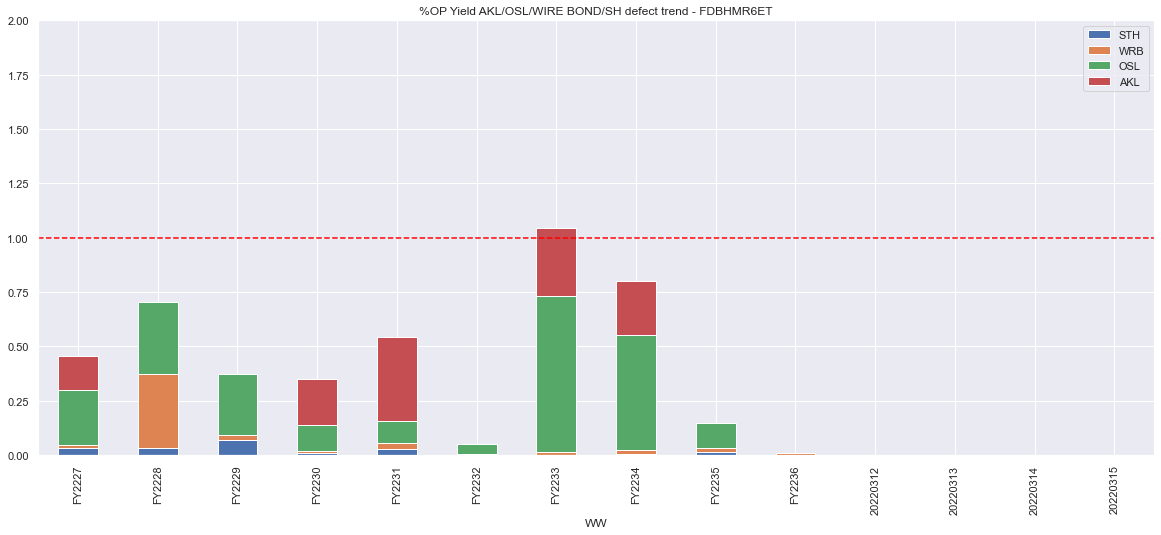

In [9]:
#set seaborn plotting aesthetics
sns.set(style='darkgrid')

#create stacked bar chart
#PP.set_index('WW').plot(kind='bar', stacked=True, color=['steelblue', 'red'])
ll.set_index('WW').plot(kind='bar', stacked=True, ylim=[0, 2], figsize=(20,8), title='%OP Yield AKL/OSL/WIRE BOND/SH defect trend - FDBHMR6ET').axhline(1, ls='--', c='red')

In [10]:
oo1 = PP.loc[PP.PRODUCT == 'EAGLERAYBP']
oo1 = oo1.iloc[:,[0,1,9]]
oo1 = oo1.rename(columns={"%DEFECT_BRK": "BRK"})
oo1

,WW,PRODUCT,BRK
0,FY2227,EAGLERAYBP,0.583525
2,FY2228,EAGLERAYBP,1.487918
4,FY2229,EAGLERAYBP,0.507595
6,FY2230,EAGLERAYBP,0.540906
8,FY2231,EAGLERAYBP,0.230643
10,FY2232,EAGLERAYBP,0.741812
12,FY2233,EAGLERAYBP,0.103882
14,FY2234,EAGLERAYBP,0.697628
16,FY2235,EAGLERAYBP,0.095761
18,FY2236,EAGLERAYBP,0.000000


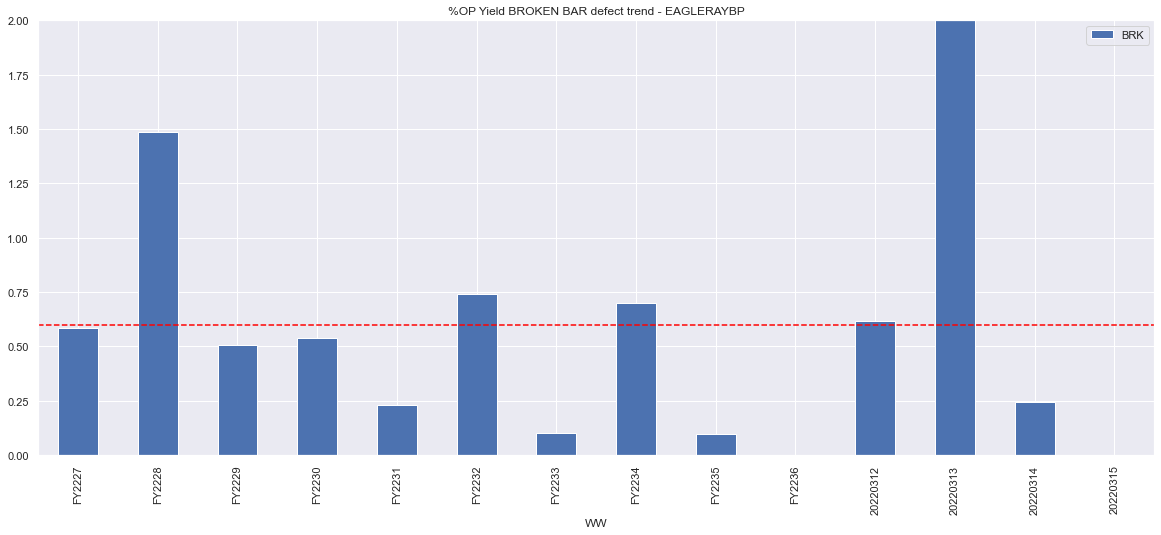

In [11]:
#set seaborn plotting aesthetics
sns.set(style='darkgrid')

#create stacked bar chart
#PP.set_index('WW').plot(kind='bar', stacked=True, color=['steelblue', 'red'])
oo1.set_index('WW').plot(kind='bar', stacked=True, ylim=[0, 2], figsize=(20,8), title='%OP Yield BROKEN BAR defect trend - EAGLERAYBP').axhline(0.6, ls='--', c='red')

In [12]:
ll1 = PP.loc[PP.PRODUCT == 'FDBHMR6ET']
ll1 = ll1.iloc[:,[0,1,9]]
ll1 = ll1.rename(columns={"%DEFECT_BRK": "BRK"})
ll1

,WW,PRODUCT,BRK
1,FY2227,FDBHMR6ET,0.428883
3,FY2228,FDBHMR6ET,1.181039
5,FY2229,FDBHMR6ET,0.779069
7,FY2230,FDBHMR6ET,0.317019
9,FY2231,FDBHMR6ET,0.799283
11,FY2232,FDBHMR6ET,0.233973
13,FY2233,FDBHMR6ET,0.699929
15,FY2234,FDBHMR6ET,0.606334
17,FY2235,FDBHMR6ET,0.133627
19,FY2236,FDBHMR6ET,0.168620


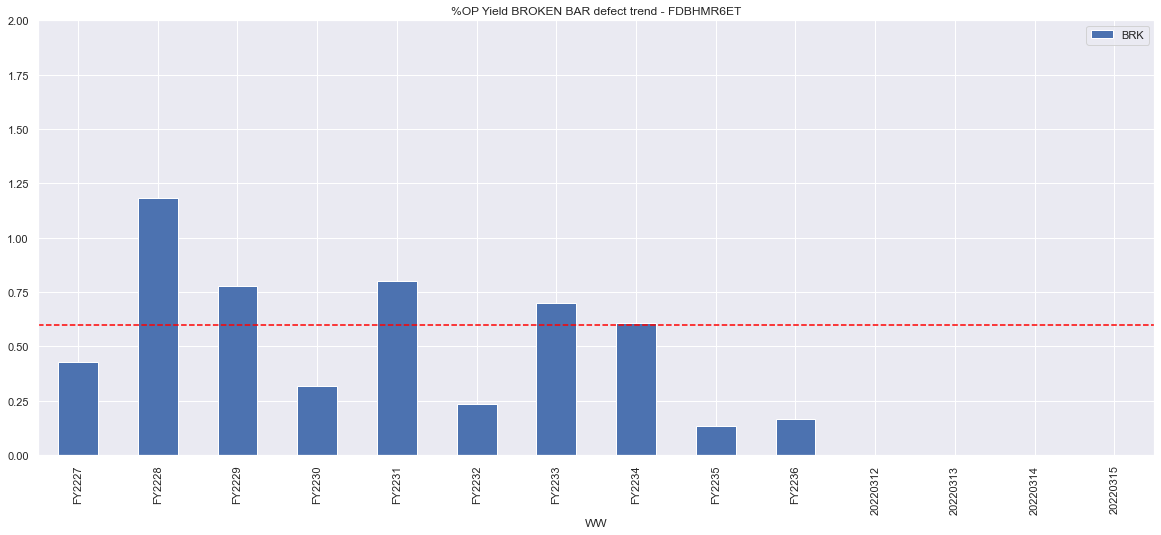

In [13]:
#set seaborn plotting aesthetics
sns.set(style='darkgrid')

#create stacked bar chart
#PP.set_index('WW').plot(kind='bar', stacked=True, color=['steelblue', 'red'])
ll1.set_index('WW').plot(kind='bar', stacked=True, ylim=[0, 2], figsize=(20,8), title='%OP Yield BROKEN BAR defect trend - FDBHMR6ET').axhline(0.6, ls='--', c='red')

In [14]:
last_date = EF_Defect.iloc[-1].Time_Date
Drill = all.loc[all.Time_Date == last_date]
Drill = Drill.iloc[:,[1,12,13,16,18]]
Drill["STEP_REASON"] = Drill["STEPNAME"]+"_"+Drill["REASONCODE"]
#Drill.dropna(subset = ["DEF_CODE"], inplace=True)
ER_PI = Drill.loc[Drill.PRODUCT == "EAGLERAYBP"]
FD_PI = Drill.loc[Drill.PRODUCT == "FDBHMR6ET"]
#ER_PI
Drill

,Time_Date,STEPNAME,REASONCODE,PRODUCT,Net_REASONQTY,STEP_REASON
387,20220315,0,0,EAGLERAYBP,0,0_0
388,20220315,0,0,EAGLERAYBP,0,0_0
389,20220315,0,0,EAGLERAYBP,0,0_0
390,20220315,0,0,EAGLERAYBP,0,0_0
391,20220315,0,0,EAGLERAYBP,0,0_0
376,20220315,0,0,FDBHMR6ET,0,0_0
377,20220315,0,0,FDBHMR6ET,0,0_0
378,20220315,0,0,FDBHMR6ET,0,0_0
379,20220315,0,0,FDBHMR6ET,0,0_0
380,20220315,0,0,FDBHMR6ET,0,0_0


<ipython-input-15-4dfcb6062722>:1: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(ER_PI.Net_REASONQTY, labels=ER_PI.STEP_REASON, autopct = autopct_format(ER_PI.Net_REASONQTY), radius =2.5,labeldistance=1.05, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, textprops={'size': 'x-large'});


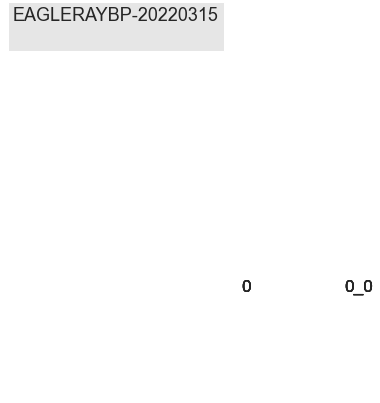

In [15]:
plt.pie(ER_PI.Net_REASONQTY, labels=ER_PI.STEP_REASON, autopct = autopct_format(ER_PI.Net_REASONQTY), radius =2.5,labeldistance=1.05, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, textprops={'size': 'x-large'});

plt.title("EAGLERAYBP-20220315\n", fontsize=18, y=1.6,bbox={'facecolor':'0.9', 'pad':5});

<ipython-input-16-2d79a88a4806>:1: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(FD_PI.Net_REASONQTY, labels=FD_PI.STEP_REASON, autopct = autopct_format(FD_PI.Net_REASONQTY), radius =2.5,labeldistance=1.05, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, textprops={'size': 'x-large'});


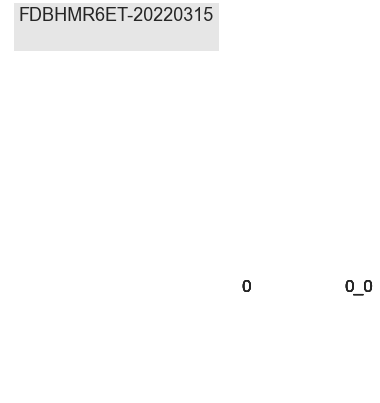

In [16]:
plt.pie(FD_PI.Net_REASONQTY, labels=FD_PI.STEP_REASON, autopct = autopct_format(FD_PI.Net_REASONQTY), radius =2.5,labeldistance=1.05, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, textprops={'size': 'x-large'});

plt.title("FDBHMR6ET-20220315\n", fontsize=18, y=1.6,bbox={'facecolor':'0.9', 'pad':5});